# Perlin noise



## Introduction 
One of the most important algorithms in computer graphics and procedural generation is Perlin Noise. Perlin Noise is an algorithm that generates textures and terrain-like images procedurally (without the need for an artist to manually create the images). Ken Perlin is the creator of this algorithm, for which he also won an Academy Award in 1997.

### What is a noise function?

There are numerous natural objects in the environment, like mountains, clouds, terrains, etc. that have some randomness in their texture. This randomness gives them their nature-like appearance. To mimic this appearance, we use algorithms like Perlin Noise. Using a procedural generating system like Perlin to generate random numbers, it is easy to reproduce the appearance of objects found in nature. Noise functions in such cases help in generating "noise" i.e random numbers by generating random variations in computer-generated models.

### Fractals

Completely random noise or numbers that are completely random in the computer-generated model don't look that natural. This is because even though natural objects have randomness in their texture, they also have some structure. The objects present in the natural environment also have some patterns that repeat. The variations present in their texture and their intensity depends on the size of the scale they are viewed in. At different scales, we see different repeating patterns and these patterns are many times similar to each other at different scales. This is also known as self-similarity and the concept of Fractals deals with such self-similar patterns. In such cases, Perlin noise helps in generating pseudo-random variations. It generates numbers that appear random but aren't actually, which helps to give computer-generated models a more natural appearance.

# Algoritm 
Perlin noise is a mathematical formula used to generate ‘realistic’ structures. It’s noise but unlike regular noise it has some coherent structure.
Perlin noise combines multiple functions called ‘octaves’ to produce natural looking surfaces. Each octave adds a layer of detail to the surface. 
For example: 
    octave 1 could be mountains, 
    octave 2 could be boulders, 
    octave 3 could be the rocks.

Lacunarity of more than 1 means that each octave will increase it’s level of fine grained detail (increased frqeuency). Lacunarity of 1 means that each octave will have the sam level of detail. Lacunarity of less than one means that each octave will get smoother. The last two are usually undesirable so a lacunarity of 2 works quite well.

Persistence determines how much each octave contributes to the overall structure of the noise map. If your persistence is 1 all octaves contribute equally. If you persistence is more than 1 sucessive octaves contribute more and you get something closer to regular noise (spoiler the regular noise image above is actually a perlin noise with a presistence of 5.0). A more default setting would be a presistance of less than 1.0 which will decrease the effect of later octaves.
In the python noise module there are a few parameters that affect what you see when you generate your perlin noise:

    scale: number that determines at what distance to view the noisemap.
    octaves: the number of levels of detail you want you perlin noise to have.
    lacunarity: number that determines how much detail is added or removed at each octave (adjusts frequency).
    persistence: number that determines how much each octave contributes to the overall shape (adjusts amplitude).



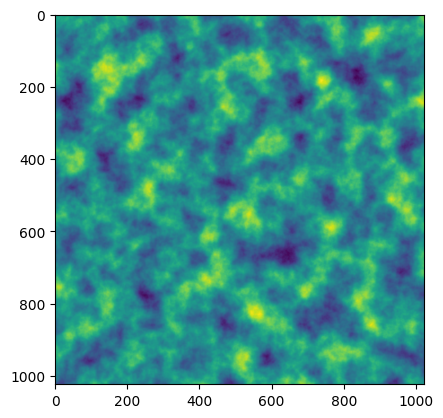

In [3]:
# default noise 
import noise
import numpy as np
import matplotlib.pyplot as plot

shape = (1024, 1024)
# scale: number that determines at what distance to view the noisemap
scale = 100.0
# octaves: the number of levels of detail you want you perlin noise to have 
octaves = 6
# persistence : number that determines how much each octave contributes to the overall shape(adjust amplitude)
persistence = 0.5
# lacunarity : number that detrmines how much detail is added or removed at each octave (adjust frequency)
lacunarity = 2.0

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i / scale,
                                    j / scale,
                                    octaves=octaves,
                                    persistence=persistence,
                                    lacunarity=lacunarity,
                                    repeatx=1024,
                                    repeaty=1024,
                                    base=0)
plot.imshow(world)
plot.show()

# Perlin noise texture in 2D using NumPy and Matplotlib libraries

## The 2D Perlin noise texture,  can be useful for procedural texture generation in computer graphics and simulations

### The main steps:

    1.Permutation Table Initialization: The function perlin() initializes a permutation table ptable using NumPy's random number generation. This table is shuffled to create a random arrangement of integers.

    2.Grid Coordinates and Distance Vector Coordinates: The input coordinates x and y are converted to integer grid coordinates xi and yi. Then, the fractional part of the coordinates, xg and yg, is computed.

    3.Fade Function Application: The fade function is applied to the fractional coordinates (xg, yg). This function smooths out the values to avoid sharp transitions.

    4.Gradient Vectors Calculation: Gradient vectors are calculated for each of the four corners of the grid cell. The gradient vectors are used to determine the direction of change in the noise function.

    5Linear Interpolation: Linear interpolation is applied to interpolate values between the gradient vectors. This step essentially blends the values based on the fractional coordinates.

    6.Grid Generation and Plotting: A grid of evenly spaced points is generated using np.meshgrid(), and the Perlin noise function is called with these grid points as input. The resulting noise texture is plotted using Matplotlib's imshow() function.

### Summary of the main functions used:

    fade(f): This function applies a smoothing function to the input values f. It's used to smooth out transitions between grid points.

    gradient(c, x, y): This function calculates gradient vectors based on a given corner index c and coordinates x and y. The gradient vectors are used to determine the direction of change in the noise function.

    lerp(a, b, x): This function performs linear interpolation between values a and b based on the interpolation factor x.


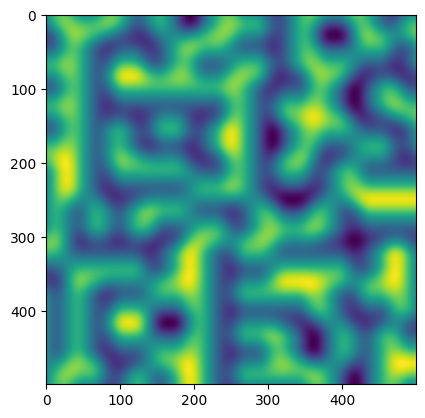

In [1]:
# create a Perlin texture in 2D

import numpy as np
import matplotlib.pyplot as plot


def perlin(x, y, seed=0):
    # create a permutation table based on number of pixels
    # seed is the initial value we want to start with
    # we also use seed function to get same set of numbers
    # this helps to keep our perlin graph smooth
    np.random.seed(seed)
    ptable = np.arange(256, dtype=int)

    # shuffle our numbers in the table
    np.random.shuffle(ptable)

    # create a 2d array and then turn it one dimensional
    # so that we can apply our dot product interpolations easily
    ptable = np.stack([ptable, ptable]).flatten()

    # grid coordinates
    xi, yi = x.astype(int), y.astype(int)

    # distance vector coordinates
    xg, yg = x - xi, y - yi

    # apply fade function to distance coordinates
    xf, yf = fade(xg), fade(yg)

    # the gradient vector coordinates in the top left, top right, bottom left bottom right

    n00 = gradient(ptable[ptable[xi] + yi], xg, yg)
    n01 = gradient(ptable[ptable[xi] + yi + 1], xg, yg - 1)
    n11 = gradient(ptable[ptable[xi + 1] + yi + 1], xg - 1, yg - 1)
    n10 = gradient(ptable[ptable[xi + 1] + yi], xg - 1, yg)

    # apply linear interpolation i.e dot product to calculate average
    x1 = lerp(n00, n10, xf)
    x2 = lerp(n01, n11, xf)
    return lerp(x1, x2, yf)


def lerp(a, b, x):
    "linear interpolation i.e dot product"
    return a + x * (b - a)


# smoothing function,
# the first derivative and second both are zero for this function

def fade(f):
    return 6 * f ** 5 - 15 * f ** 4 + 10 * f ** 3


# calculate the gradient vectors and dot product
def gradient(c, x, y):
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    gradient_co = vectors[c % 4]
    return gradient_co[:, :, 0] * x + gradient_co[:, :, 1] * y


# create evenly spaced out numbers in a specified interval
lin_array = np.linspace(1, 10, 500, endpoint=False)

# create grid using linear 1d arrays
x, y = np.meshgrid(lin_array, lin_array)

# generate graph
plot.imshow(perlin(x, y, seed=2), origin='upper')

plot.show()

